In [18]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os, sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from wordcloud import WordCloud

In [3]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils
import src.plotter as plotter


In [4]:
path_of_data = 'C:/Users/ok/Desktop/Week_0/week-0/data/select/'

In [5]:
#retrives the path for all subfolders in a folder
def get_subfolder_paths(folder_path):
    subfolder_paths = []
    
    for root, dirs, files in os.walk(folder_path):
        for dir_name in dirs:
            # Replace backslashes with forward slashes in the path
            subfolder_path = os.path.join(root, dir_name).replace("\\", "/")
            subfolder_paths.append(subfolder_path)
    
    return subfolder_paths

# Get all subfolder paths
path = get_subfolder_paths(path_of_data)

In [117]:
len(path)# number of channels

39

In [6]:
all_data = []

for i in path:
    df = utils.slack_parser(i)
    all_data.append(df)

# Concatenate all dataframes into one
data = pd.concat(all_data, ignore_index=True)

In [120]:
data.head()

,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel
0,message,"Hi guys,\nI thought having a group chat would ...",Anita Rodriguez,1661766066.863109,text,0,0,0,0,0,ab_test-group
1,message,good!!,Michael Gonzalez,1661766159.852649,text,0,0,0,0,0,ab_test-group
2,message,Thanks <@U03U9FWPNCE>,Robert Carter,1661766226.215889,text,0,0,0,0,0,ab_test-group
3,message,Nice <@U03U9FWPNCE>,Phillip Atkins,1661766241.597379,text,0,0,0,0,0,ab_test-group
4,message,I have been missing deadlines and I am trying ...,Anita Rodriguez,1661766295.939119,text,0,0,0,0,0,ab_test-group


In [22]:
loader = SlackDataLoader(path)

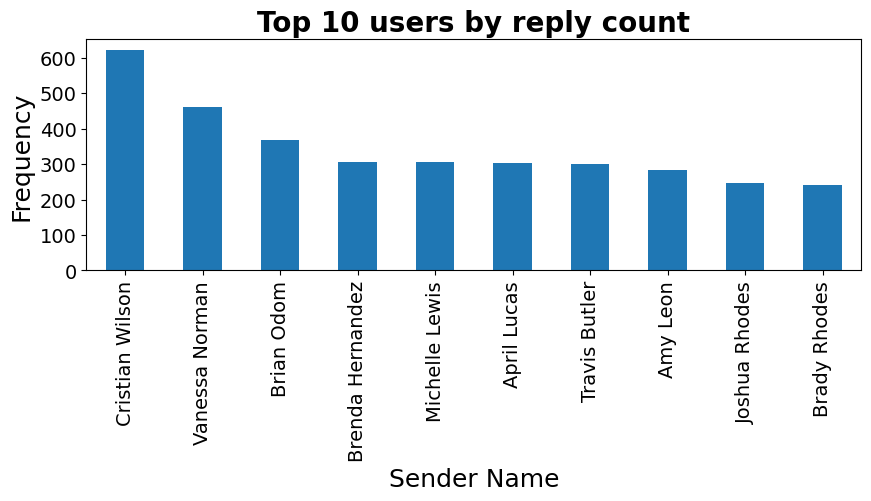

In [129]:
#top 10 users by reply count
data.groupby('sender_name')['reply_count'].sum().sort_values(ascending=False)[:10]\
.plot(kind='bar', figsize=(10,3));
plt.title('Top 10 users by reply count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
plt.xticks(size=14); plt.yticks(size=14);
plt.show()

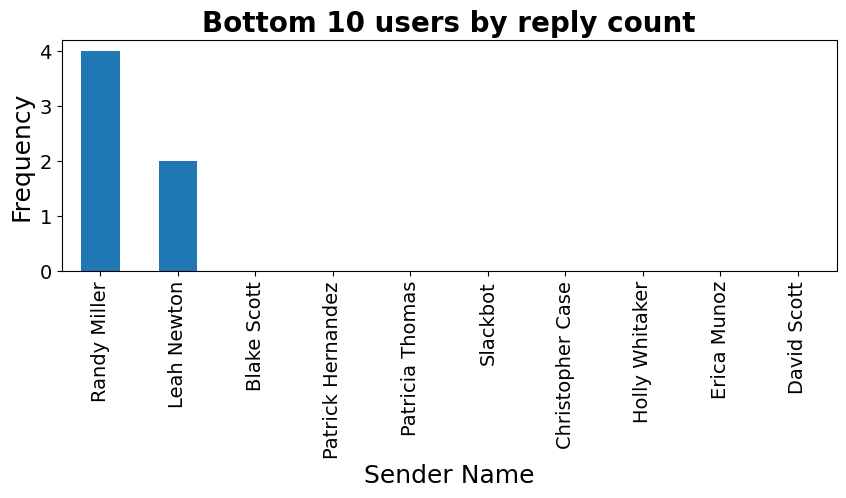

In [130]:
#top 10 and bottom 10 users by reply count
data.groupby('sender_name')['reply_count'].sum().sort_values(ascending=False)[-10:]\
.plot(kind='bar', figsize=(10,3));
plt.title('Bottom 10 users by reply count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
plt.xticks(size=14); plt.yticks(size=14);
plt.show()

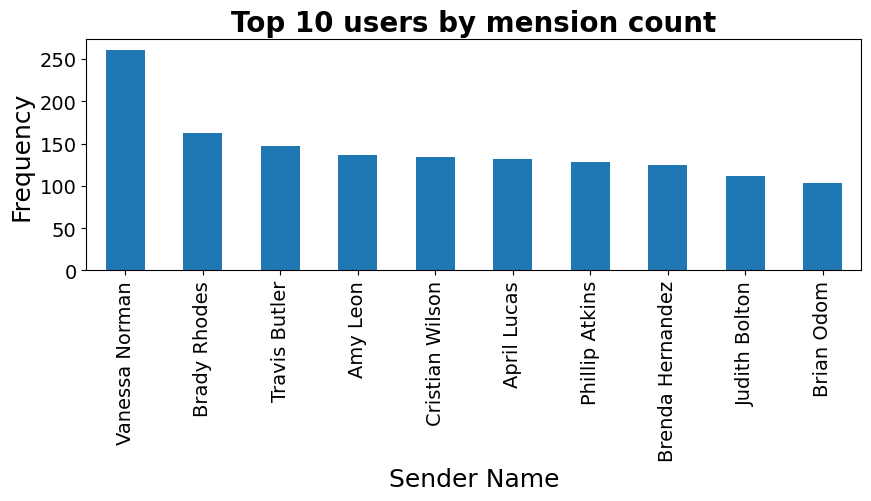

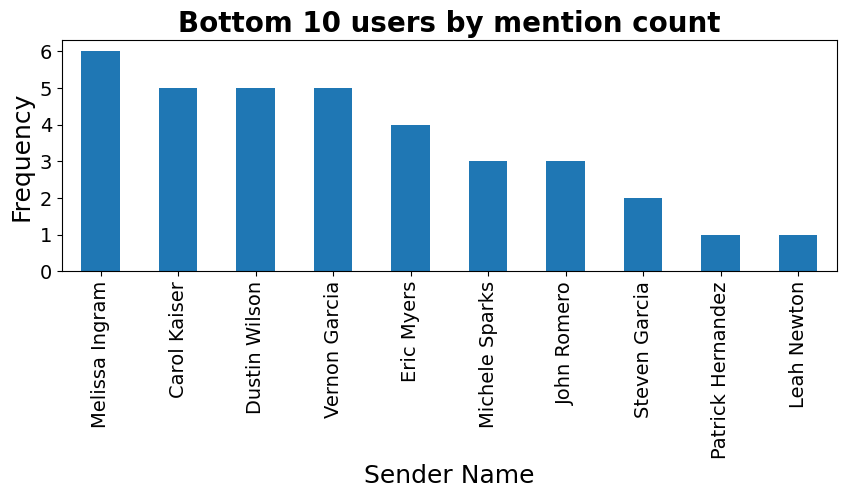

In [131]:
#top and bottom 10 users by mentions
#first lets filter the mention messages  (they contain @)
mention_counts = data[data['msg_content'].str.contains('@U\w+')]
#find the top 10 users by mention count
mention_counts.groupby('sender_name')['msg_content'].count().sort_values(ascending=False)[:10]\
.plot(kind='bar', figsize=(10,3));
plt.title('Top 10 users by mension count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
plt.xticks(size=14); plt.yticks(size=14);
plt.show()

mention_counts.groupby('sender_name')['msg_content'].count().sort_values(ascending=False)[-10:]\
.plot(kind='bar', figsize=(10, 3));
plt.title('Bottom 10 users by mention count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
plt.xticks(size=14); plt.yticks(size=14);
plt.show()

In [ ]:
#top and bottom 10 users by reaction count
parsed_reaction_data = utils.parse_slack_reaction(week_8_path)
parsed_reaction_data['reaction_count'] = parsed_reaction_data['reaction_name'].apply(len)

reaction_counts = parsed_reaction_data.groupby('message')['reaction_count'].sum().sort_values(ascending=False)


,reaction_name,reaction_count,reaction_users_count,message,user_id,channel


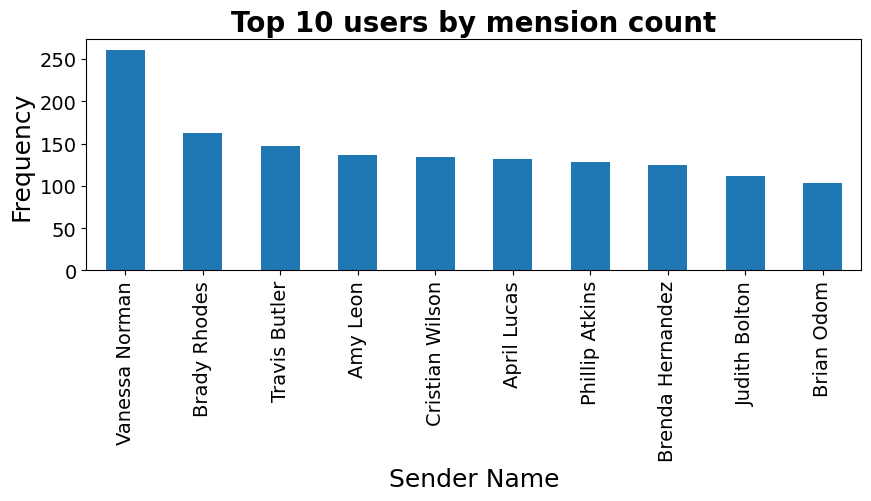

In [132]:
#top and bottom 10 messages by replies
replies_count = data.nlargest(10, 'reply_count')[['msg_content', 'reply_count']]

mention_counts.groupby('sender_name')['msg_content'].count().sort_values(ascending=False)[:10]\
.plot(kind='bar', figsize=(10,3));
plt.title('Top 10 users by mension count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
plt.xticks(size=14); plt.yticks(size=14);
plt.show()

In [133]:
#for the top 10 messages by replies
top = data.groupby('msg_content')['reply_count'].sum().sort_values(ascending = False)[:10]
print('The top 10 messages by reply count are\n{}\n'.format(top))
#for bottom 10 messages by reply coount
bott = data.groupby('msg_content')['reply_count'].sum().sort_values(ascending = False)[-10:]
print('The bottom 10 messages by reply count are\n{}\n'.format(bott))

The top 10 messages by reply count are
msg_content
<@U03V1AM5TFA> how many crushes you have?                                                                                                                                                                                           75
First Impression: People think I am older than I am,\nWhy: My hairline                                                                                                                                                              63
1. How do I find my jupyter notebook file in my instance(using the terminal)?  \n2. How do I find folders I've created in my remote machine inside jupyter notebook web-interface?\n<@U03UKL27B0R> <@U03V8LHPDME>                   61
How many here follow football so much? I think it is almost everyone.                                                                                                                                                               57
Ethiopian New year Loadin

In [134]:
#top and bottom 10 messages by mentions are
mention_count = data['msg_content'].str.count(r'@\w+')
data['mention_count'] = mention_count
top_10_messages = data[['msg_content', 'mention_count']].nlargest(10, 'mention_count')
bot_10_messages = data[['msg_content', 'mention_count']].nsmallest(10, 'mention_count')
print('The top 10 messages by mention count are:\n{}\n'.format(top_10_messages))
print('The bottom 10 messages by mention count are:\n{}\n'.format(bot_10_messages))


The top 10 messages by mention count are:
                                             msg_content  mention_count
9488   I am grateful for <@U03U93GNNVB>, <@U03UUN8M4R...             25
9466   Knowing <!here> is just great one way or the o...             20
9447   I am grateful to <@U03U9DB7REG> for answering ...             17
8481   1. Work ethic\n2. How communication and openne...             16
16926  <@U03UVHCV6KB> <@U03UUP56MDF> <@U03UJGRN5E0> <...             13
3195   Thanks to the team <@U03UP7V9Q57> <@U03UKL27B0...             12
5952   NEWS NEWS *<!here>*........:drum_with_drumstic...              9
1487   Who else is from Addis Ababa?\n1. <@U03UVHCV6K...              8
1538   Hello\n1. <@U03UVHCV6KB>\n2. <@U03UG5VFN03>\n3...              8
1582   <@U03UVHCV6KB> <@U03V61VGQG0> <@U03UJGRN5E0> <...              8

The bottom 10 messages by mention count are:
                                          msg_content  mention_count
1                                              good

In [144]:
#channels with high activity

top_users_per_channel = reply_counts.apply(lambda x: x.nlargest(10))

# Reshape the data for Seaborn's lineplot
top_users_per_channel = top_users_per_channel.stack().reset_index()
top_users_per_channel.columns = ['Channel', 'User', 'Reply Count']

top_users_list = top_users_per_channel['User'].value_counts().nlargest(10).index
top_users_per_channel = top_users_per_channel[top_users_per_channel['User'].isin(top_users_list)]


# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Channel', y='Reply Count', hue='User', data=top_users_per_channel, marker='o')

# for line in range(0, top_users_per_channel.shape[0]):
#     plt.text(top_users_per_channel['Channel'][line], top_users_per_channel['Reply Count'][line],
#              f"{top_users_per_channel['User'][line]} ({top_users_per_channel['Reply Count'][line]})",
#              horizontalalignment='right', verticalalignment='bottom', fontsize='small')

plt.title('Top 10 Users\' Reply Count per Channel')
plt.xlabel('Channel')
plt.ylabel('Reply Count')
plt.xticks(rotation=45)
plt.legend(title='Top 10 Users', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'reply_counts' is not defined

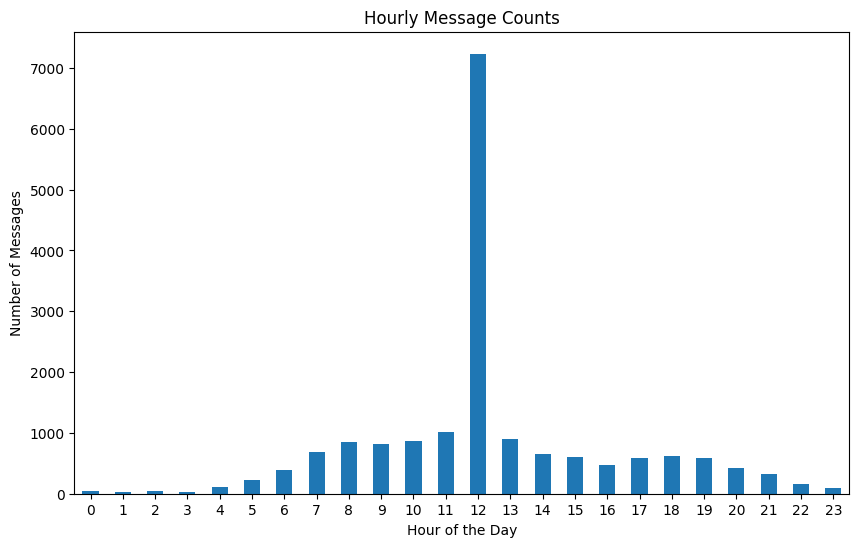

The hour with the most messages is 12:00 with 7233 messages.


In [136]:
# Convert 'msg_sent_time' column to datetime format
data['msg_sent_time'] = pd.to_datetime(data['msg_sent_time'], unit='s')

# Extract hour from message timestamps
data['hour_sent'] = data['msg_sent_time'].dt.hour

# Group messages by hour and count the number of messages in each hour
hourly_message_count = data.groupby('hour_sent').size()

# Find the hour with the maximum number of messages
hour_peak = hourly_message_count.idxmax()
max_messages = hourly_message_count.max()

# Visualize hourly message counts
hourly_message_count.plot(kind='bar', figsize=(10, 6))
plt.title('Hourly Message Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()

print(f"The hour with the most messages is {hour_peak}:00 with {max_messages} messages.")

In [137]:
#which messages were perplied within five minutes
#first convert the time the message was sent and the time the first reply was sent
data['msg_sent_time'] = pd.to_datetime(data['msg_sent_time'], unit='s')
data['time_thread_start'] = pd.to_datetime(data['time_thread_start'], unit='s')

#now we can filterout the messages that dont have replies
replied_msg = data[data['reply_count'] != 0]

# now we can find the time difference between the first message and the first reply
time_difference =  replied_msg['time_thread_start'] - replied_msg['msg_sent_time']

# Filter messages with time difference less than or equal to 5 minutes
messages_within_5_min = replied_msg[time_difference <= pd.Timedelta(minutes=5)]


In [138]:
#filter messages with time difference less than or equal to 5 minutes
messages_within_5_min = replied_msg[time_difference <= pd.Timedelta(minutes=5)]
#calculate the fraction of messages replied within 5 minutes
fraction_replied_within_5_min = len(messages_within_5_min) / len(data) if len(data) != 0 else 0
print(f"Fraction of messages replied within 5 minutes: {fraction_replied_within_5_min*100}")

Fraction of messages replied within 5 minutes: 9.30809105251296


C:\Program Files\KMSpico\temp\ipykernel_20160\4176232056.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


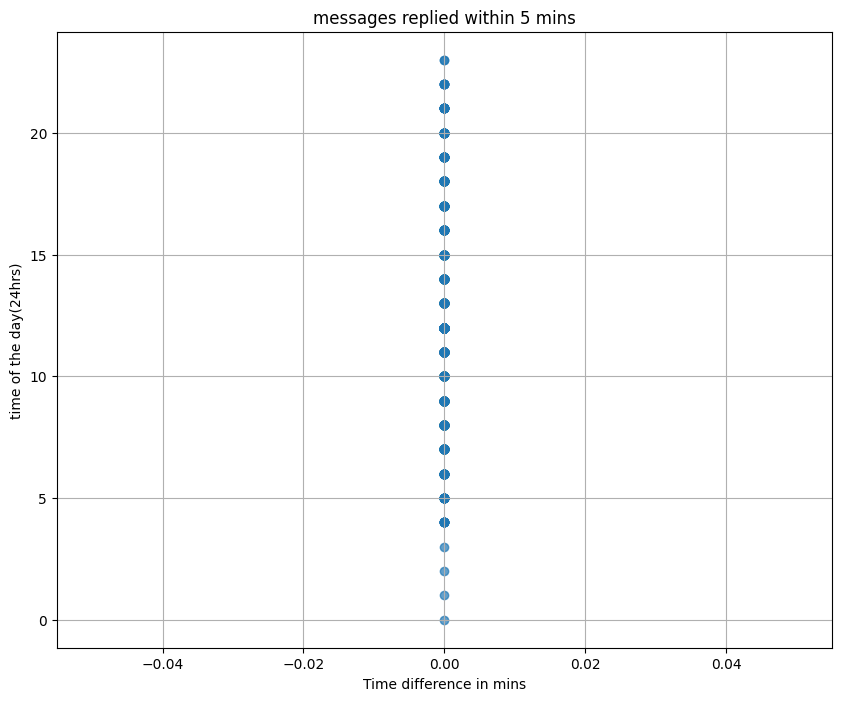

In [151]:
messages_within_5_min['hour_sent'] = messages_within_5_min['msg_sent_time'].dt.hour

plt.figure(figsize=(10,8))
plt.scatter(
    (messages_within_5_min['time_thread_start'] - messages_within_5_min['msg_sent_time']).dt.total_seconds() / 60,
    messages_within_5_min['hour_sent'],
    # c=messages_within_5_min['channel_label'],
    cmap='viridis',
    alpha=0.7
)

plt.xlabel('Time difference in mins')
plt.ylabel('time of the day(24hrs)')
plt.title('messages replied within 5 mins')

# plt.colorbar(label='Channel')
plt.grid(True)
plt.show()

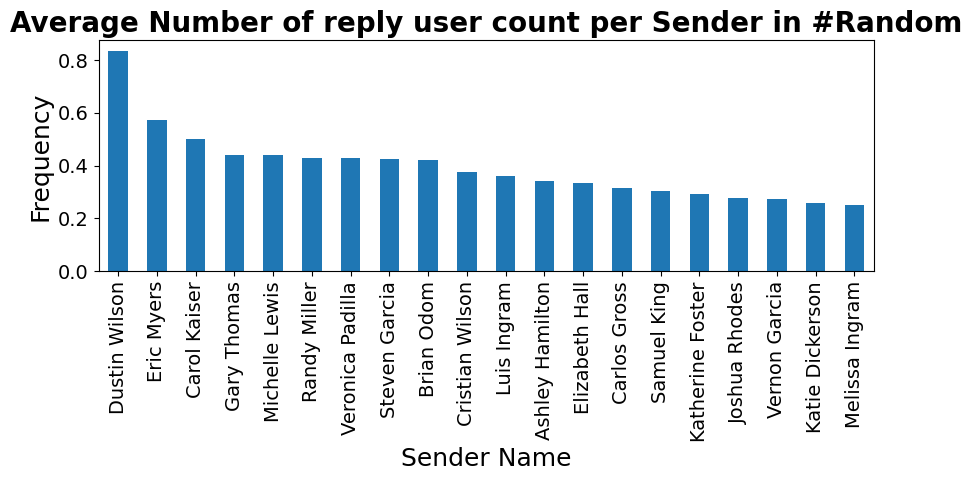

In [150]:
plotter.draw_avg_reply_users_count(data)

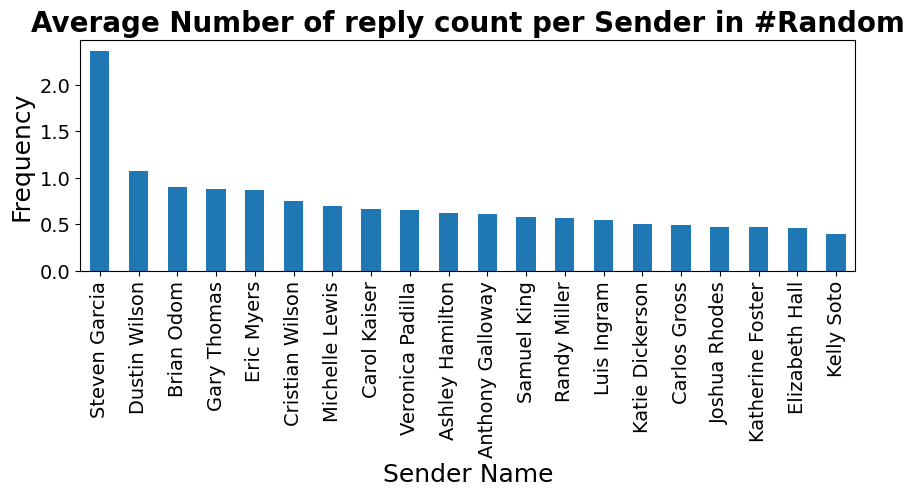

In [149]:
plotter.draw_avg_reply_count(data)

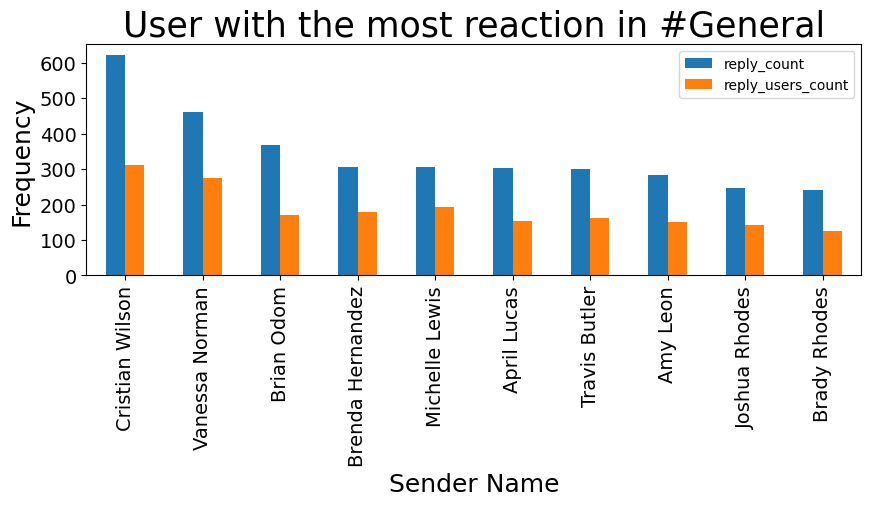

In [148]:
plotter.draw_user_reaction(data)

## Insight Extraction

Below are some useful questions to answer. Feel free to explore to answer other interesting questions that may be of help to get insight about student's behaviour, need, and future performance 

In [141]:
X = data['sender_name'].value_counts()[:10]
Y = data['sender_name'].value_counts()[-10:]

print('the top 10 users by message count are: \n{}'.format(X))
print(f'and the users from the bottom 10 are: \n{Y}')

the top 10 users by message count are: 
Vanessa Norman      1288
Amy Leon            1150
Travis Butler       1075
April Lucas          991
Brenda Hernandez     843
Cristian Wilson      831
Phillip Atkins       754
Brady Rhodes         641
Judith Bolton        574
Joshua Rhodes        519
Name: sender_name, dtype: int64
and the users from the bottom 10 are: 
Leah Newton          10
Patricia Thomas       8
Randy Miller          7
Patrick Hernandez     5
Slackbot              3
Holly Whitaker        1
Erica Munoz           1
David Scott           1
Blake Scott           1
Christopher Case      1
Name: sender_name, dtype: int64


In [7]:
file_path = 'C:/Users/ok/Desktop/Week_0/week-0/data/all_data.csv'
data.to_csv(file_path, index=False)  # to export the dataframe to csv file

### Harder questions to look into

In [ ]:
# Based on messages, reactions, references shared, and other relevant data such as classification of questions into techical question, comment, answer, aorder stu the python, statistics, and sql skill level of a user?